[In the first, you have to make a shortcut link to the data in your google drive](https://drive.google.com/file/d/1Z6vyjLLf3dx_gEb9Xd4IzDMRDiCjzx-Q/view)


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2 as cv
import os
import random
from typing import List
import numpy as np
import pickle

In [138]:
def serialize_images(list_images, name):
  with open(name + '.pickle', 'wb') as handle:
          pickle.dump(np.array(list_images, dtype=object), handle, protocol=pickle.HIGHEST_PROTOCOL)

def deserialize_images(name):
  with open(name + '.pickle', 'rb') as handle:
           root = pickle.load(handle)   
           return root

In [113]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


We will be using the Cars dataset provided by Kaggle, for this project. 

1. Download the images

In [114]:
%mkdir data

mkdir: cannot create directory ‘data’: File exists


In [115]:
!unzip /gdrive/MyDrive/kaggle_cars_data.zip

Archive:  /gdrive/MyDrive/kaggle_cars_data.zip
replace data/test/swift/03hnkjxhh2w83-IN.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/test/swift/03hnkjxhh2w83-IN.jpg  
  inflating: data/test/swift/03jxnlgy0jof3-IN.jpg  
  inflating: data/test/swift/07wx78v7q2xq-IN.jpg  
  inflating: data/test/swift/0aa2pr4uspgv1-IN.jpg  
  inflating: data/test/swift/0d2vshwzpl47-IN.jpg  
  inflating: data/test/swift/0eevnmjwqhwo1-IN.jpg  
  inflating: data/test/swift/0h25y93uxltq2-IN.jpg  
  inflating: data/test/swift/0jsbaz6cn5ej2-IN.jpg  
  inflating: data/test/swift/0k1qauxe04wh2-IN.jpg  
  inflating: data/test/swift/0kyhgeg8ei7o-IN.jpg  
  inflating: data/test/swift/0rwyuwdhxq263-IN.jpg  
  inflating: data/test/swift/0y1uw00h8qgp1-IN.jpg  
  inflating: data/test/swift/10g41cpjyura2-IN.jpg  
  inflating: data/test/swift/10ummzdgi5em1-IN.jpg  
  inflating: data/test/swift/17332v9hsoq01-IN.jpg  
  inflating: data/test/swift/19pvkwwtmo3q1-IN.jpg  
  inflating: data/test/swift/1c5aeixln

2. Parse the images in each class (folder) and get a list of images in each of the class.

In [116]:
swift_test_dir = os.path.join('data/test/swift')
wagonr_test_dir = os.path.join('data/test/wagonr')

swift_validation_dir = os.path.join('data/validation/swift')
wagonr_validation_dir = os.path.join('data/validation/wagonr')

swift_train_dir = os.path.join('data/train/swift')
wagonr_train_dir = os.path.join('data/train/wagonr')

swift_train_files = os.listdir(swift_train_dir)
print(swift_train_files[:10])

wagonr_train_files = os.listdir(wagonr_train_dir)
print(wagonr_train_files[:10])

swift_validation_files = os.listdir(swift_validation_dir)
print(swift_validation_files[:10])

wagonr_validation_files = os.listdir(wagonr_validation_dir)
print(wagonr_validation_files[:10])

swift_test_files = os.listdir(swift_test_dir)
print(swift_test_files[:10])

wagonr_test_files = os.listdir(wagonr_test_dir)
print(wagonr_test_files[:10])

print('total training swift images:', len(swift_train_files))
print('total validating swift images:', len(swift_validation_files))
print('total testing swift images:', len(swift_test_files))

print('total training wagonr images:', len(wagonr_train_files))
print('total validating wagonr images:', len(wagonr_validation_files))
print('total testing wagonr images:', len(wagonr_test_files))

['lxzv24wuetja2-IN.jpg', '7irrx9rurr8i3-IN.jpg', 'z3247v0nu3v82-IN.jpg', 'z92l28yezeoo-IN.jpg', 'wr4xyi6iyhf-IN.jpg', 'nhki7hcfnrmv2-IN.jpg', 'dsd6mn4sv29r1-IN.jpg', 'y0nx99w80sg53-IN.jpg', '352mbbgm04s21-IN.jpg', 'k6v38z3cuc8j1-IN.jpg']
['82qwie8lcs2h3-IN.jpg', '9jmk40he4unm3-IN.jpg', '9l7qxjy6w8kq1-IN.jpg', 'p3tulffzz90m-IN.jpg', 'aqt9i14f7r2u-IN.jpg', '3tw9dnou6sd21-IN.jpg', 'rov1fy5qu6xg2-IN.jpg', '81gfb2mjn6vl1-IN.jpg', 'g4jx68p5rw962-IN.jpg', '8kxovx6yassm1-IN.jpg']
['0ww74mcxq8l73-IN.jpg', 'q4vxga8x0bcw2-IN.jpg', 'md6mb2uiaa4z1-IN.jpg', 'vdpy2dcqkp303-IN.jpg', 'sxvtc8s16pf5-IN.jpg', 'mor553cyl5h33-IN.jpg', '7bz6k52x8vue2-IN.jpg', '9zex29f0806-IN.jpg', '49f76p7l0qz32-IN.jpg', 'fcfdw6dryne7-IN.jpg']
['55rtcoeq8csr1-IN.jpg', '2ntr19ipt6ac-IN.jpg', 'd92rjv5pz1md1-IN.jpg', 'tn5bdz2jp5we-IN.jpg', 'uthwy11a3zba1-IN.jpg', 'rchhgh8ymhb83-IN.jpg', 'r87hvwwfujpf-IN.jpg', 'r07n72mhygkl1-IN.jpg', 'hzq1o5oad86x1-IN.jpg', 'booots6ncow4-IN.jpg']
['3wkgcqskrdro3-IN.jpg', 'xrvreyjue1h4-IN.jpg', '

3. Use OpenCV to read images from each class, from train, validation and test splits.

In [129]:
def read_image(in_file):
    image = cv.imread(in_file)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image = resize_(image)
    image = normalize(image)
    return image

def get_the_image_list(input_path, input_list):
    image_list = [read_image(input_path + '/' + im) for im in input_list]
    return image_list  

def normalize(im):
    return im / 255.

def resize_(image: object = None, scale_factor: int = 100):
    """
    resize image to increase performance
    return: resized image by factor scale_factor
    """
    h, w = image.shape[0], image.shape[1]

    scale = round(scale_factor/h,3)
    return cv.resize(image, None, None, scale, scale) # default INTER_LINEAR    

In [130]:
all_images_train = {}
all_images_validation = {}
all_images_test = {}

images = get_the_image_list(swift_train_dir, swift_train_files)
all_images_train['swift'] = images
images = get_the_image_list(wagonr_train_dir, wagonr_train_files)
all_images_train['wagonr'] = images

images = get_the_image_list(swift_validation_dir, swift_validation_files)
all_images_validation['swift'] = images
images = get_the_image_list(wagonr_validation_dir, wagonr_validation_files)
all_images_validation['wagonr'] = images

images = get_the_image_list(swift_test_dir, swift_test_files)
all_images_test['swift'] = images
images = get_the_image_list(wagonr_test_dir, wagonr_test_files)
all_images_test['wagonr'] = images

In [119]:
def show_ten_random(list_of_images, title):
  nrows = 5
  ncols = 2
  # Set up matplotlib fig, and size it to fit 4x4 pics
  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)
  fig.suptitle(title)

  random_number = random.choices(list(range(len(list_of_images))), k=10)
  for i, num in enumerate(random_number):
    
    sp = plt.subplot(nrows, ncols, i + 1)

    sp.axis('Off') # Don't show axes (or gridlines)
    plt.imshow(list_of_images[num])

  plt.show()

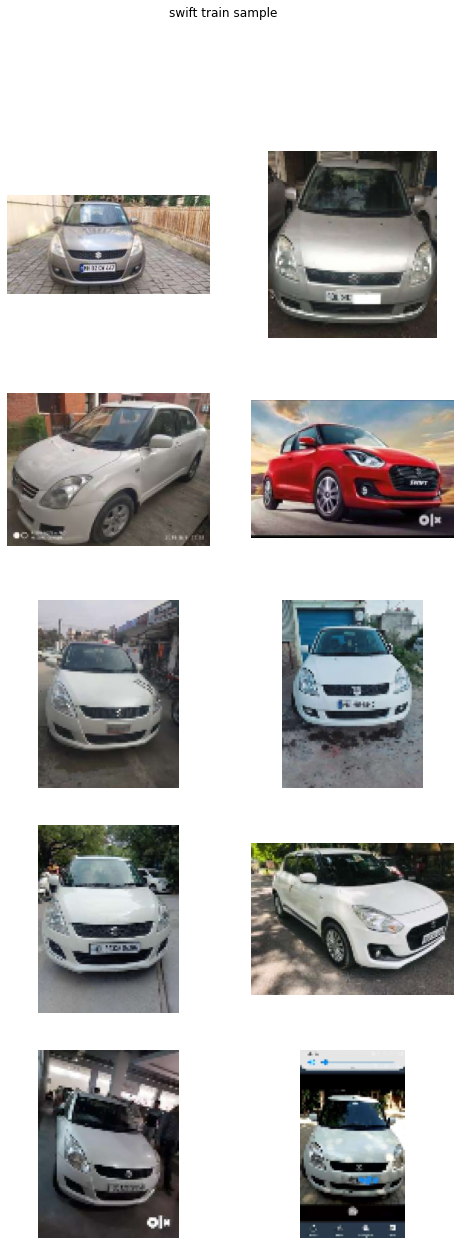

In [131]:
show_ten_random(all_images_train.get('swift'), "swift train sample")

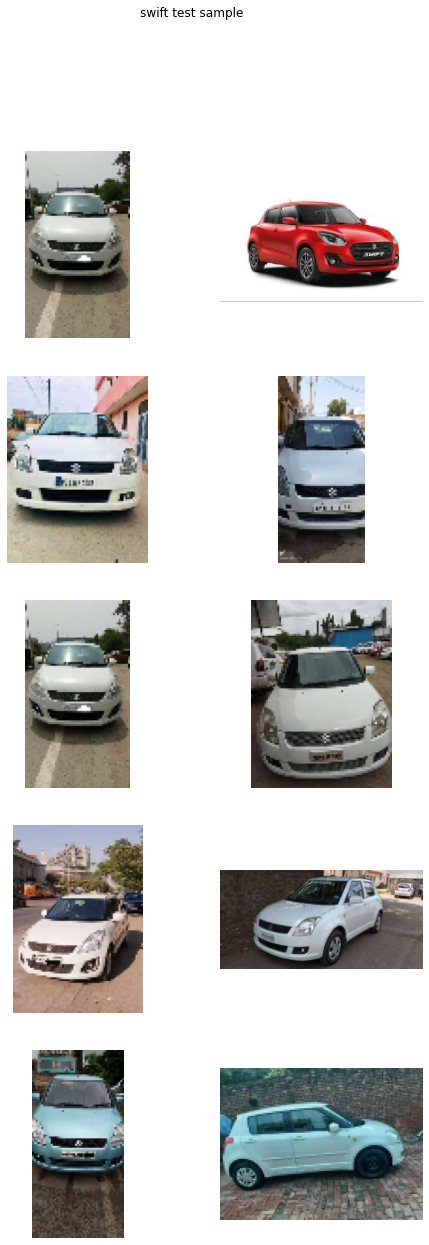

In [121]:
show_ten_random(all_images_test.get('swift'), "swift test sample")

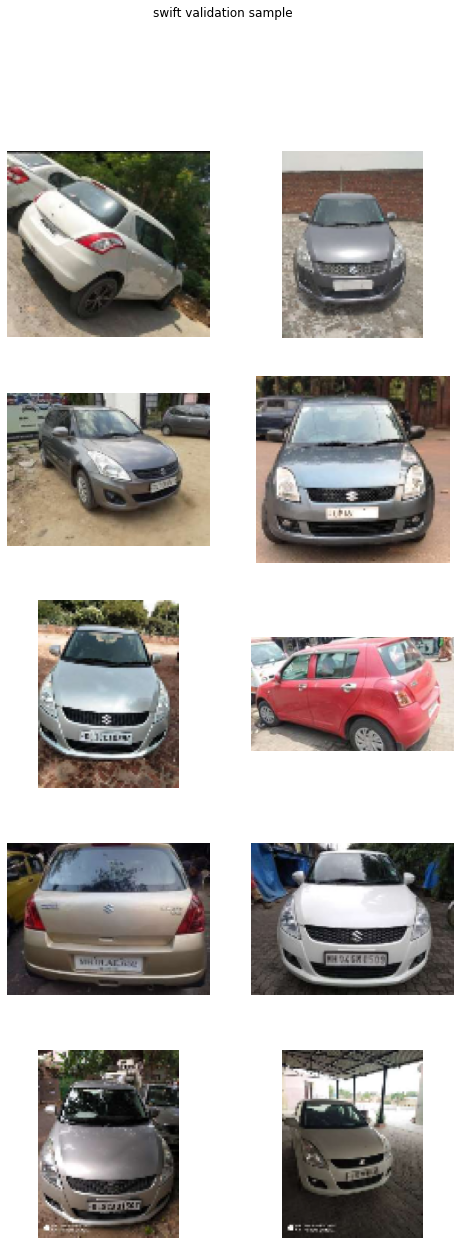

In [122]:
show_ten_random(all_images_validation.get('swift'), "swift validation sample")

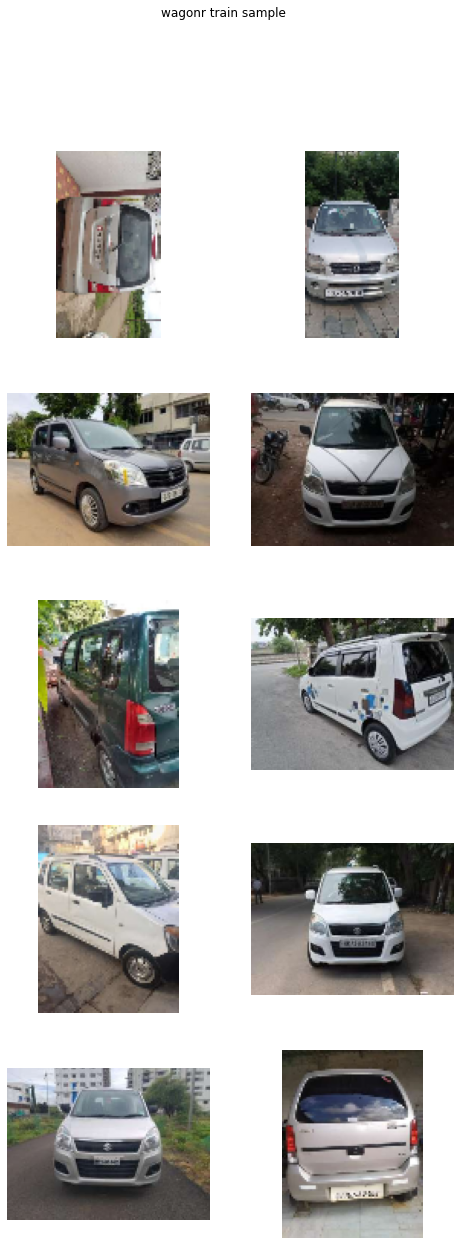

In [123]:
show_ten_random(all_images_train.get('wagonr'), "wagonr train sample")

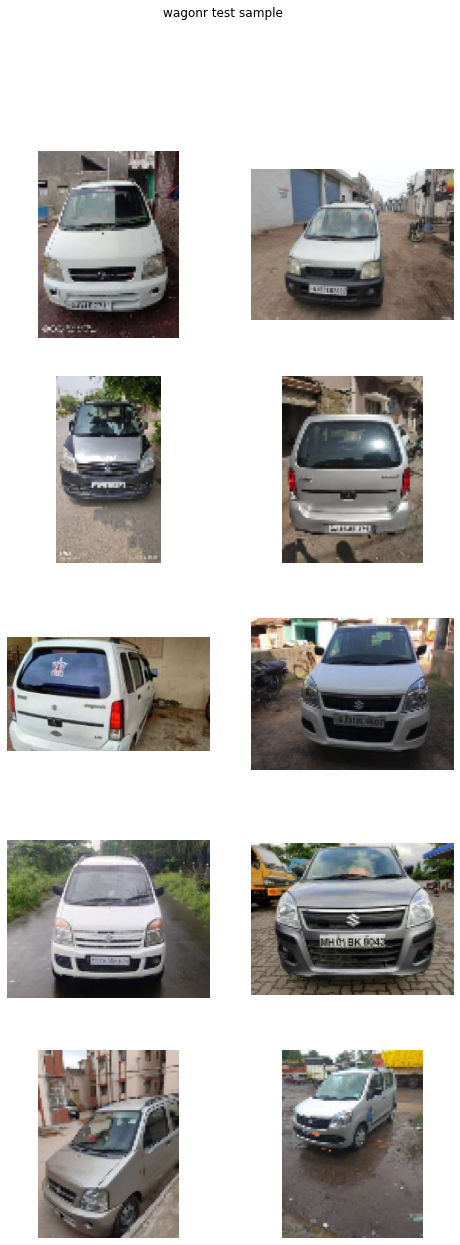

In [124]:
show_ten_random(all_images_test.get('wagonr'), "wagonr test sample")

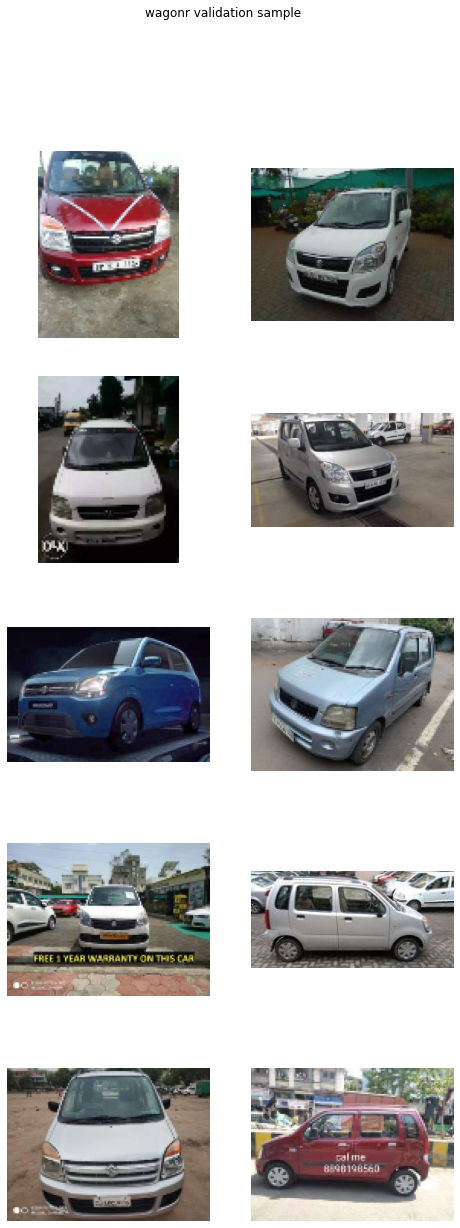

In [125]:
show_ten_random(all_images_validation.get('wagonr'), "wagonr validation sample")

Evaluate the distribution of the data splits

In [126]:
def number_of_images_per_class(list_train: List[list], list_validation: List[list], 
                               list_test: List[list]) -> int:
   numbers = [len(list_train), len(list_validation), len(list_test)]                
   return numbers

In [127]:
number_of_images_swift = number_of_images_per_class(swift_train_files, swift_validation_files, swift_test_files)
number_of_images_wagonr = number_of_images_per_class(wagonr_train_files, wagonr_validation_files, wagonr_test_files)

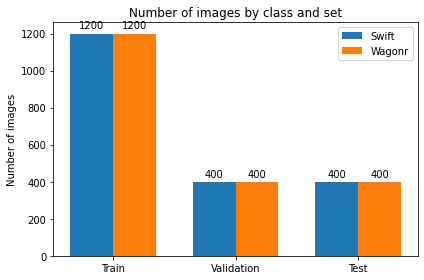

In [128]:
labels = ['Train', 'Validation', 'Test']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, number_of_images_swift, width, label='Swift')
rects2 = ax.bar(x + width/2, number_of_images_wagonr, width, label='Wagonr')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of images')
ax.set_title('Number of images by class and set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Store the image and label arrays to the local file system

In [134]:
list_images = [all_images_train.get('swift'), all_images_validation.get('swift'), all_images_test.get('swift'),
all_images_train.get('wagonr'), all_images_validation.get('wagonr'), all_images_test.get('wagonr')]

In [135]:
serialize_images(list_images, "swift_wagonr")

In [139]:
list_images = deserialize_images("swift_wagonr")

In [141]:
list_images.shape

(6,)

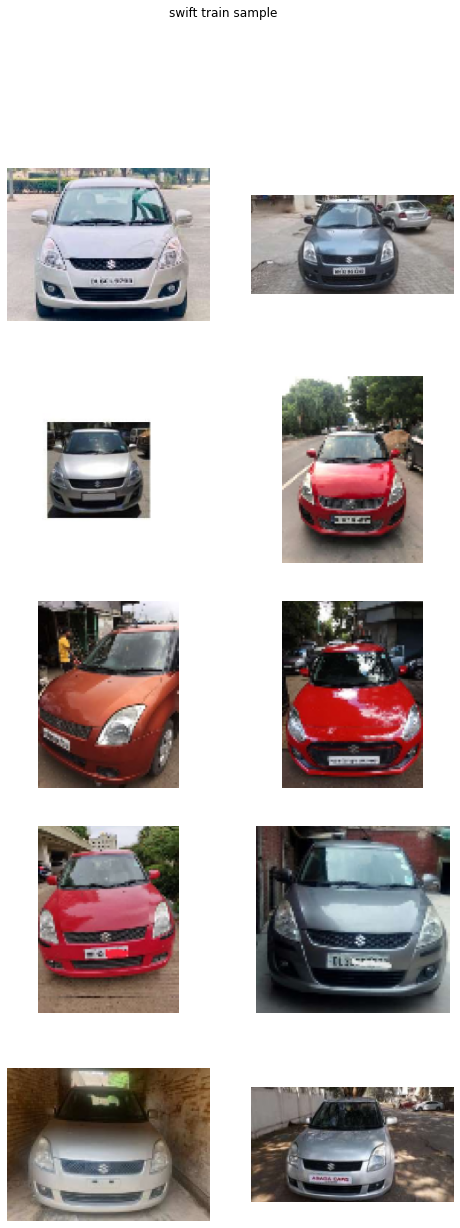

In [142]:
show_ten_random(list_images[0], "swift train sample")